In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv('top5_data_after_target_encoding.csv')
data

,Unnamed: 0,index,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),...,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구,평당가,평당가.1
0,0,0,5148.718800,8.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,...,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,5209.875129,9647.193456,9647.193456
1,1,2,5148.718800,9.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,...,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,5209.875129,9457.011996,9457.011996
2,2,3,5148.718800,10.0,2019.0,7187557.0,5327314.0,94.3,-4024.0,-1663.0,...,1187.44,9.01,1947.56,10.99,645.18,13.37,4557.982620,5209.875129,9922.827555,9922.827555
3,3,4,5148.718800,10.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,...,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,5209.875129,8951.081313,8951.081313
4,4,5,5148.718800,24.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,...,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,5209.875129,9768.698964,9768.698964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14660,14660,18324,4662.681663,26.0,2008.0,6911022.0,4483275.0,101.4,1630.0,-6739.0,...,1353.43,6.25,2293.61,6.41,695.33,3.37,5128.702256,5209.875129,3680.023030,3680.023030
14661,14661,18325,4662.681663,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,5209.875129,2453.348687,2453.348687
14662,14662,18326,4662.681663,33.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,5209.875129,3620.330546,3620.330546
14663,14663,18328,4662.681663,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,5209.875129,3306.957161,3306.957161


In [57]:
data = data.drop('Unnamed: 0', axis=1) #필요 없는 컬럼 제거

In [58]:
data

,index,아파트 브랜드,층,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,계약연도,클러스터링_구,평당가,평당가.1
0,0,5148.718800,8.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,...,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,5209.875129,9647.193456,9647.193456
1,2,5148.718800,9.0,2019.0,9277921.0,4933751.0,94.3,6708.0,3935.0,46672.995,...,1220.65,-5.51,1987.01,-6.23,610.73,-4.94,4557.982620,5209.875129,9457.011996,9457.011996
2,3,5148.718800,10.0,2019.0,7187557.0,5327314.0,94.3,-4024.0,-1663.0,20871.755,...,1187.44,9.01,1947.56,10.99,645.18,13.37,4557.982620,5209.875129,9922.827555,9922.827555
3,4,5148.718800,10.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,...,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,5209.875129,8951.081313,8951.081313
4,5,5148.718800,24.0,2019.0,10945748.0,8624217.0,94.1,1942.0,193.0,18127.483,...,1238.06,4.26,2029.60,4.21,713.68,10.62,4557.982620,5209.875129,9768.698964,9768.698964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14660,18324,4662.681663,26.0,2008.0,6911022.0,4483275.0,101.4,1630.0,-6739.0,14446.593,...,1353.43,6.25,2293.61,6.41,695.33,3.37,5128.702256,5209.875129,3680.023030,3680.023030
14661,18325,4662.681663,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,5209.875129,2453.348687,2453.348687
14662,18326,4662.681663,33.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,5209.875129,3620.330546,3620.330546
14663,18328,4662.681663,22.0,2008.0,14731854.0,10055966.0,96.3,2677.0,-4774.0,33635.767,...,1316.55,-8.92,2236.40,-9.55,679.29,-6.89,5128.702256,5209.875129,3306.957161,3306.957161


In [59]:
column_names = data.columns
print(column_names)

Index(['index', '아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '클러스터링_구', '평당가', '평당가.1'],
      dtype='object')


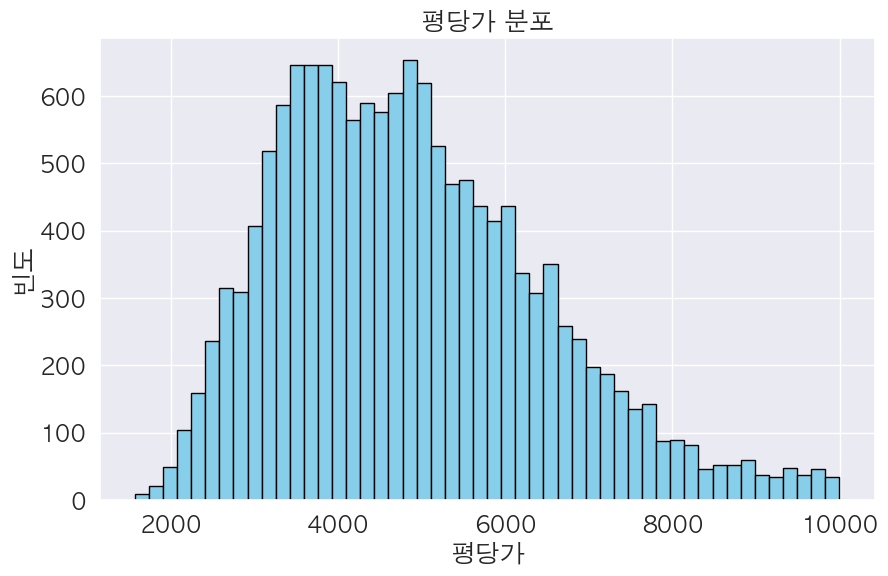

In [60]:
import matplotlib.pyplot as plt

# 폰트 설정 (맥 사용자를 위한 AppleGothic)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12  # 글씨 크기 조절
plt.rcParams['figure.figsize'] = [10, 6]  # 그래프 크기 조절

# 히스토그램 생성
plt.hist(data['평당가'], bins=50, color='skyblue', edgecolor='black')

# 레이블 및 타이틀 설정
plt.xlabel('평당가')
plt.ylabel('빈도')
plt.title('평당가 분포')

# 그리드 추가 (가독성 향상)
plt.grid(True)

# 그래프 표시
plt.show()

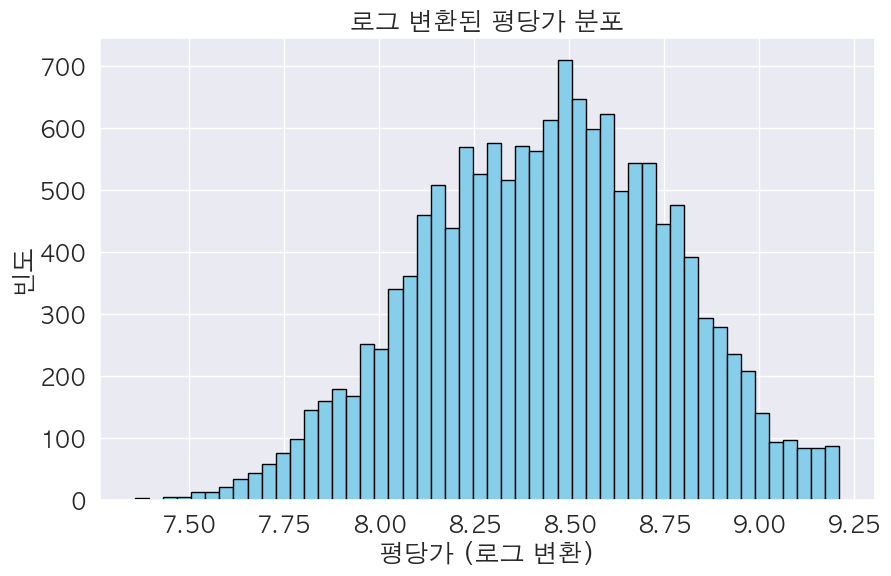

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 폰트 및 그래프 스타일 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [10, 6]

# '평당가' 열에 로그 변환 적용
data['평당가'] = np.log1p(data['평당가'])

# 로그 변환된 데이터의 히스토그램 시각화
plt.hist(data['평당가'], bins=50, color='skyblue', edgecolor='black')

# x축과 y축 레이블 설정
plt.xlabel('평당가 (로그 변환)')
plt.ylabel('빈도')

# 그래프 타이틀 설정
plt.title('로그 변환된 평당가 분포')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()


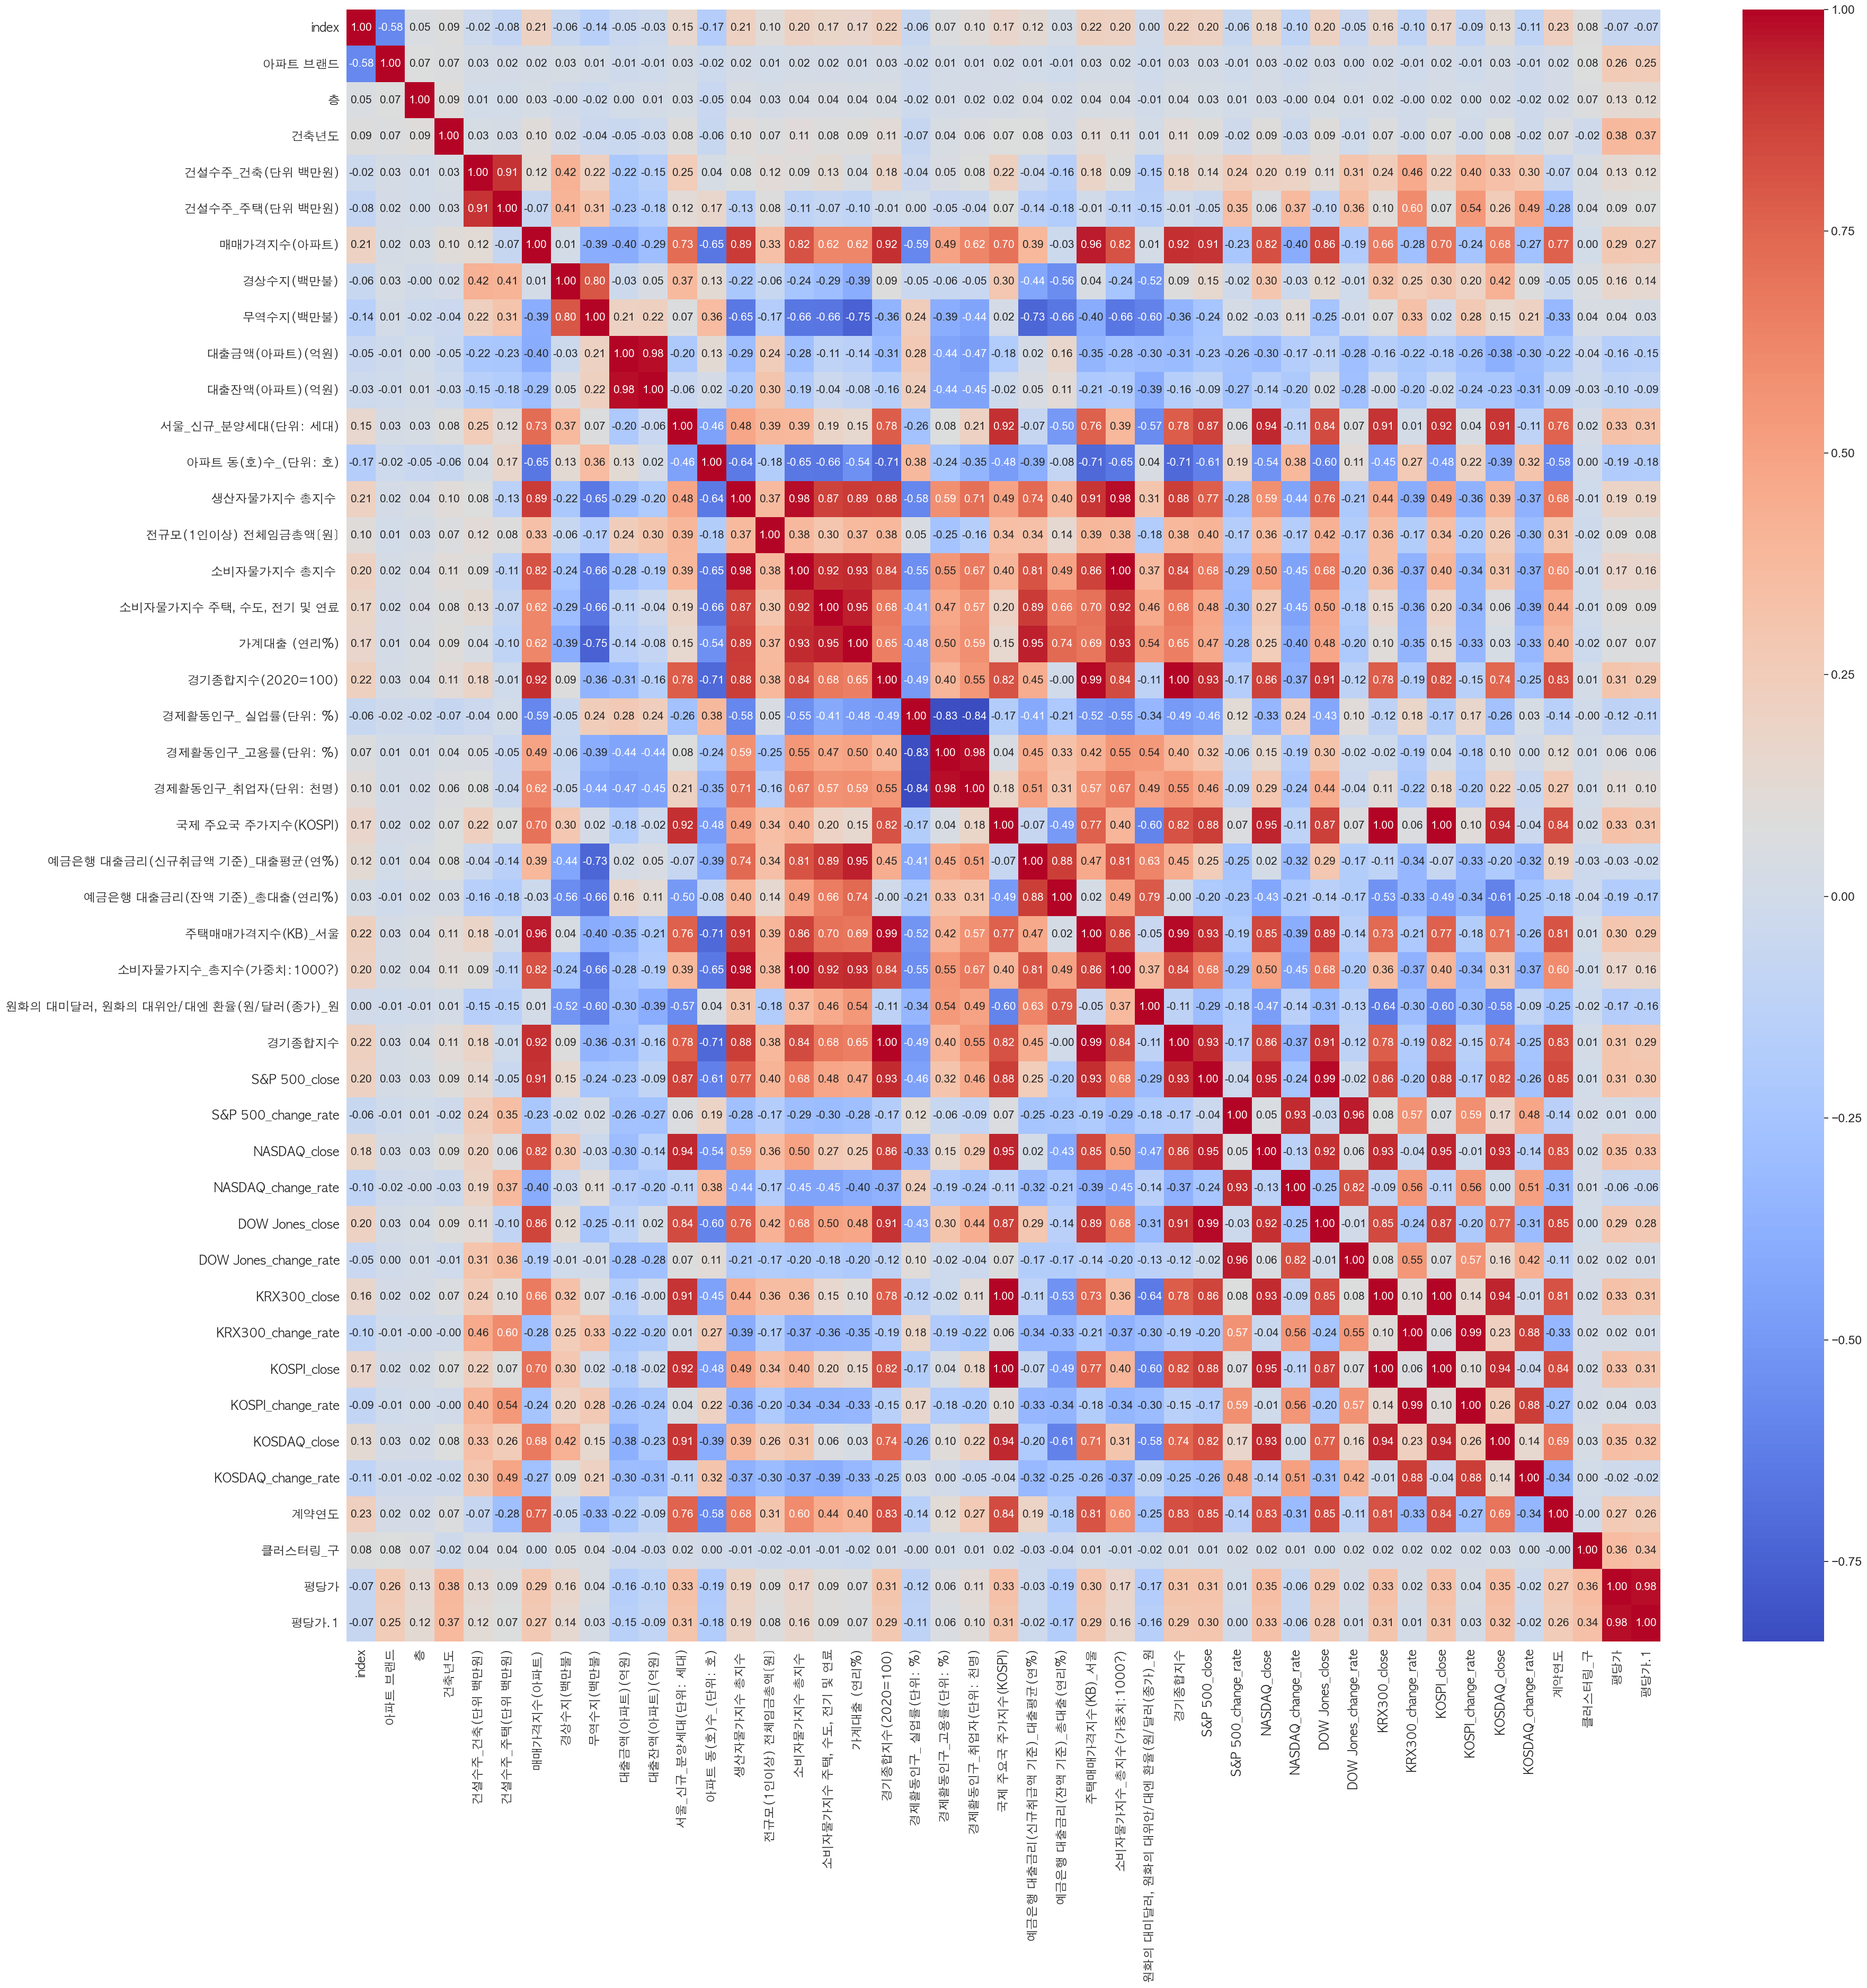

In [62]:
plt.rcParams['font.family'] = 'AppleGothic' # 맥 사용자

cols = ['index', '아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '클러스터링_구', '평당가', '평당가.1']

corr = data[cols].corr(method = 'pearson') #피어슨 상관계수를 구하는 것

fig = plt.figure(figsize = (40, 40)) #시각화
ax = fig.gca()

sns.set(font_scale=1.5) 
hm = sns.heatmap(corr.values, annot=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols,xticklabels=cols,ax=ax,cmap="coolwarm")
plt.show()


In [63]:
# VIF Check

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 분석에 필요한 변수들을 선택
selected_columns = ['index', '아파트 브랜드', '층', '건축년도', '건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)',
       '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)',
       '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)',
       '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ',
       '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)',
       '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)',
       '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
       '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울',
       '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원',
       '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close',
       'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate',
       'KRX300_close', 'KRX300_change_rate', 'KOSPI_close',
       'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도',
       '클러스터링_구', '평당가', '평당가.1']

# 선택한 변수들로 데이터프레임 생성
df_selected = data[selected_columns]

# 데이터에 해당 컬럼들이 존재하는지 확인
if all(column in data.columns for column in selected_columns):
    df_selected = data[selected_columns]
else:
    raise ValueError("Some selected columns are not in the data frame")

# VIF 계산 함수
def calculate_vif(data_frame):
    # 데이터 프레임 내 결측치나 무한값이 있는지 확인
    if data_frame.isnull().values.any() or np.isinf(data_frame.values).any():
        raise ValueError("Data frame contains NaN or infinite values which cannot be processed for VIF calculation")

    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# VIF 계산
try:
    vif_result = calculate_vif(df_selected)
    # VIF가 높은 변수 확인
    high_vif_variables = vif_result[vif_result['VIF'] > 10]['Variable'].tolist()
    print(f'다중공산성이 높은 변수: {high_vif_variables}')
except Exception as e:
    print(f"Error occurred during VIF calculation: {e}")


/Users/daehyunkim/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


다중공산성이 높은 변수: ['건설수주_건축(단위 백만원)', '건설수주_주택(단위 백만원)', '매매가격지수(아파트)', '경상수지(백만불)', '무역수지(백만불)', '대출금액(아파트)(억원)', '대출잔액(아파트)(억원)', '서울_신규_분양세대(단위: 세대)', '아파트 동(호)수_(단위: 호)', '생산자물가지수 총지수 ', '전규모(1인이상) 전체임금총액[원]', '소비자물가지수 총지수 ', '소비자물가지수 주택, 수도, 전기 및 연료', '가계대출 (연리%)', '경기종합지수(2020=100)', '경제활동인구_ 실업률(단위: %)', '경제활동인구_고용률(단위: %)', '경제활동인구_취업자(단위: 천명)', '국제 주요국 주가지수(KOSPI)', '예금은행 대출금리(신규취급액 기준)_대출평균(연%)', '예금은행 대출금리(잔액 기준)_총대출(연리%)', '주택매매가격지수(KB)_서울', '소비자물가지수_총지수(가중치:1000?)', '원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원', '경기종합지수', 'S&P 500_close', 'S&P 500_change_rate', 'NASDAQ_close', 'NASDAQ_change_rate', 'DOW Jones_close', 'DOW Jones_change_rate', 'KRX300_close', 'KRX300_change_rate', 'KOSPI_close', 'KOSPI_change_rate', 'KOSDAQ_close', 'KOSDAQ_change_rate', '계약연도', '평당가', '평당가.1']


VIF 사용: 층, 아파트브랜드, 클러스터링_구, 건축년도, 평당가

In [102]:
import pandas as pd

# 출력할 열 선택
selected_columns = ['아파트 브랜드', '층', '클러스터링_구', '건축년도', '평당가']

# 선택된 열만 포함하는 데이터프레임 생성
data_selected_columns = data[selected_columns]

# 컬럼명 축약 (예시)
data_selected_columns.columns = ['브랜드', '층', '클러스터 구', '건축년도', '평당가']

# pandas 출력 옵션 설정
pd.set_option('display.float_format', '{:.2f}'.format)  # 소수점 두 자리까지 표시
pd.set_option('display.max_columns', len(selected_columns))  # 모든 열을 표시
pd.set_option('display.max_rows', 10)  # 출력할 최대 행 수

# 데이터프레임 스타일링 (예시)
styled = data_selected_columns.head().style.hide_index()
styled


/var/folders/3_/x71n0dfx597b2bmnkl6m82hm0000gn/T/ipykernel_39302/3091825518.py:18: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  styled = data_selected_columns.head().style.hide_index()


브랜드,층,클러스터 구,건축년도,평당가
5148.718800,8.000000,5209.875129,2019.000000,9.174526
5148.718800,9.000000,5209.875129,2019.000000,9.154617
5148.718800,10.000000,5209.875129,2019.000000,9.202694
5148.718800,10.000000,5209.875129,2019.000000,9.099641
5148.718800,24.000000,5209.875129,2019.000000,9.187041


In [87]:
import numpy as np
import pandas as pd

# 데이터 프레임이 정의되었는지 확인
if 'data' in locals():
    if isinstance(data, pd.DataFrame) and '평당가' in data.columns:
        # 상관 관계 행렬 생성
        correlation_matrix = data.corr()

        # '평당가'와 다른 변수들 간의 상관 관계의 절대값 계산 및 정렬
        correlation_with_target = correlation_matrix['평당가'].abs().sort_values(ascending=False)

        # 상관 관계 임계값 설정
        threshold = 0.1  # 예시로 임계값을 0.1로 설정

        # 임계값보다 높은 상관 관계를 가진 특성들 선택
        significant_features = correlation_with_target[correlation_with_target > threshold].index

        # 임계값과 선택된 중요한 특성들 출력
        print(f"상관 관계 임계값: {threshold}")
        print("상관 관계가 임계값 이상인 중요한 특성들:")
        for feature in significant_features:
            print(f"- {feature}")
    else:
        print("오류: 'data'는 pandas DataFrame이어야 하며 '평당가' 컬럼을 포함해야 합니다.")
else:
    print("오류: 'data' 데이터 프레임이 정의되지 않았습니다.")


상관 관계 임계값: 0.1
상관 관계가 임계값 이상인 중요한 특성들:
- 평당가
- 평당가.1
- 건축년도
- 클러스터링_구
- KOSDAQ_close
- NASDAQ_close
- 서울_신규_분양세대(단위: 세대)
- KOSPI_close
- 국제 주요국 주가지수(KOSPI)
- KRX300_close
- S&P 500_close
- 경기종합지수(2020=100)
- 경기종합지수
- 주택매매가격지수(KB)_서울
- DOW Jones_close
- 매매가격지수(아파트)
- 계약연도
- 아파트 브랜드
- 생산자물가지수 총지수 
- 아파트 동(호)수_(단위: 호)
- 예금은행 대출금리(잔액 기준)_총대출(연리%)
- 소비자물가지수 총지수 
- 소비자물가지수_총지수(가중치:1000?)
- 원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원
- 경상수지(백만불)
- 대출금액(아파트)(억원)
- 건설수주_건축(단위 백만원)
- 층
- 경제활동인구_ 실업률(단위: %)
- 경제활동인구_취업자(단위: 천명)
- 대출잔액(아파트)(억원)


In [88]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# 데이터셋이 정의되었는지 확인
if 'data' in locals():
    if isinstance(data, pd.DataFrame) and '평당가' in data.columns:
        # 독립 변수(X)와 종속 변수(y) 설정
        X = data.drop(['평당가'], axis=1)
        y = data['평당가']

        # 선형 회귀 모델 생성 및 학습
        model = LinearRegression()
        model.fit(X, y)

        # 회귀 계수의 중요도 계산
        coef_importance = pd.Series(model.coef_, index=X.columns).abs().sort_values(ascending=False)

        # 회귀 계수의 중요도에 따른 임계값 설정
        threshold = 0.5  # 예시로 임계값을 0.5로 설정

        # 임계값보다 높은 중요도를 가진 특성들 선택
        significant_features_coef = coef_importance[coef_importance > threshold].index

        # 선택된 중요한 특성들 출력
        print("회귀 계수의 중요도가 임계값 이상인 특성들:")
        for feature in significant_features_coef:
            print(f"- {feature}")
    else:
        print("오류: 'data'는 pandas DataFrame이어야 하며 '평당가' 컬럼을 포함해야 합니다.")
else:
    print("오류: 'data' 데이터 프레임이 정의되지 않았습니다.")

회귀 계수의 중요도가 임계값 이상인 특성들:
- S&P 500_change_rate
- NASDAQ_change_rate
- DOW Jones_change_rate


In [89]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pandas as pd

# 데이터와 모델 검증
if 'X' in locals() and 'y' in locals():
    if isinstance(X, pd.DataFrame) and isinstance(y, pd.Series):
        # 선형 회귀 모델 생성 및 RFE 설정
        model = LinearRegression()
        rfe = RFE(model, n_features_to_select=5)  # 선택할 특성의 개수 설정

        # RFE를 사용하여 특성 선택 및 학습
        fit = rfe.fit(X, y)

        # 선택된 중요한 특성들 출력
        significant_features_rfe = X.columns[fit.support_]
        print("RFE를 통해 선택된 중요한 특성들:")
        for feature in significant_features_rfe:
            print(f"- {feature}")
    else:
        print("오류: 'X'와 'y'는 pandas DataFrame과 Series 형태여야 합니다.")
else:
    print("오류: 'X'와 'y'가 정의되지 않았습니다.")

RFE를 통해 선택된 중요한 특성들:
- 소비자물가지수 총지수 
- 경기종합지수(2020=100)
- 소비자물가지수_총지수(가중치:1000?)
- 경기종합지수
- DOW Jones_change_rate


In [90]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 데이터와 모델 검증
if 'X' in locals() and 'y' in locals():
    if isinstance(X, pd.DataFrame) and isinstance(y, pd.Series):
        # 랜덤 포레스트 회귀 모델 생성 및 학습
        model = RandomForestRegressor()
        model.fit(X, y)

        # 특성 중요도 계산 및 정렬
        feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

        # 특성 중요도에 따른 임계값 설정
        threshold = 0.01  # 예시로 임계값을 0.01로 설정

        # 임계값보다 높은 중요도를 가진 특성들 선택
        significant_features_rf = feature_importance[feature_importance > threshold].index

        # 선택된 중요한 특성들 출력
        print("특성 중요도가 임계값 이상인 중요한 특성들:")
        for feature in significant_features_rf:
            print(f"- {feature}")
    else:
        print("오류: 'X'와 'y'는 pandas DataFrame과 Series 형태여야 합니다.")
else:
    print("오류: 'X'와 'y'가 정의되지 않았습니다.")

특성 중요도가 임계값 이상인 중요한 특성들:
- 평당가.1


In [91]:
# 교차 검증
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas as pd

# 데이터셋이 정의되었는지 확인
if 'data' in locals():
    if isinstance(data, pd.DataFrame):
        # 데이터셋에서 사용할 특성과 타겟 변수 정의
        features = data[['아파트 브랜드', '층', '클러스터링_구', '건축년도']]
        target = data['평당가']

        # 데이터를 훈련 및 검증 세트, 테스트 세트로 분할 (테스트 세트는 전체의 20%)
        X_train_valid, X_test, y_train_valid, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

        # 훈련 및 검증 세트를 훈련 세트와 검증 세트로 분할 (검증 세트는 훈련 및 검증 세트의 20%)
        X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=42)
    else:
        print("오류: 'data'는 pandas DataFrame이어야 합니다.")
else:
    print("오류: 'data' 데이터 프레임이 정의되지 않았습니다.")


In [92]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

MSE(Mean Squared Error)는 모델의 성능을 평가하는 데 사용되며, 값이 낮을수록 좋은 성능을 의미

### Random Forest

In [93]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 랜덤 포레스트 모델 및 하이퍼파라미터 그리드 설정
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, 
                              cv=5, scoring='neg_mean_squared_error', verbose=0)
rf_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
rf_best = rf_grid_search.best_estimator_
rf_cv_scores = cross_val_score(rf_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest Cross-Validation MSE: {-rf_cv_scores.mean():.4f}')


Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Cross-Validation MSE: 0.0427


### XGBoost

In [94]:
from xgboost import XGBRegressor

# XGBoost 모델 및 하이퍼파라미터 그리드 설정
xgb_model = XGBRegressor(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=0)
xgb_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for XGBoost:", xgb_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
xgb_best = xgb_grid_search.best_estimator_
xgb_cv_scores = cross_val_score(xgb_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'XGBoost Cross-Validation MSE: {-xgb_cv_scores.mean():.4f}')

Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
XGBoost Cross-Validation MSE: 0.0433


### Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성 및 교차 검증
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression Cross-Validation MSE: {-linear_cv_scores.mean():.4f}')

Linear Regression Cross-Validation MSE: 0.0708


### SVR

In [96]:
from sklearn.svm import SVR

# SVM 모델 및 하이퍼파라미터 그리드 설정
svm_model = SVR()
svm_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=0)
svm_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for SVM:", svm_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
svm_best = svm_grid_search.best_estimator_
svm_cv_scores = cross_val_score(svm_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'SVM Cross-Validation MSE: {-svm_cv_scores.mean():.4f}')

Best Hyperparameters for SVM: {'C': 1, 'gamma': 0.1}
SVM Cross-Validation MSE: 0.0510


### GradientBoosting

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

# 그래디언트 부스팅 모델 및 하이퍼파라미터 그리드 설정
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

# 그리드 서치 실행
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, 
                              cv=5, scoring='neg_mean_squared_error', verbose=0)
gb_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for Gradient Boosting:", gb_grid_search.best_params_)

# 교차 검증
gb_best = gb_grid_search.best_estimator_
gb_cv_scores = cross_val_score(gb_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting Cross-Validation MSE: {-gb_cv_scores.mean():.4f}')


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting Cross-Validation MSE: 0.0440


### KNN

In [98]:
from sklearn.neighbors import KNeighborsRegressor

# KNN 모델 및 하이퍼파라미터 그리드 설정
knn_model = KNeighborsRegressor()
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# 그리드 서치 실행
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, 
                               cv=5, scoring='neg_mean_squared_error', verbose=0)
knn_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for KNN:", knn_grid_search.best_params_)

# 교차 검증
knn_best = knn_grid_search.best_estimator_
knn_cv_scores = cross_val_score(knn_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'KNN Cross-Validation MSE: {-knn_cv_scores.mean():.4f}')


Best Hyperparameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
KNN Cross-Validation MSE: 0.0525


### Ridge Model

In [99]:
from sklearn.linear_model import Ridge

# 릿지 회귀 모델 및 하이퍼파라미터 그리드 설정
ridge_model = Ridge()
ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid, 
                                 cv=5, scoring='neg_mean_squared_error', verbose=0)
ridge_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for Ridge Regression:", ridge_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
ridge_best = ridge_grid_search.best_estimator_
ridge_cv_scores = cross_val_score(ridge_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Ridge Regression Cross-Validation MSE: {-ridge_cv_scores.mean():.4f}')


Best Hyperparameters for Ridge Regression: {'alpha': 100}
Ridge Regression Cross-Validation MSE: 0.0708


### Lasso Model

In [100]:
from sklearn.linear_model import Lasso

# 라쏘 회귀 모델 및 하이퍼파라미터 그리드 설정
lasso_model = Lasso(random_state=42)
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

# 그리드 서치 실행 - 최적의 하이퍼파라미터 탐색
lasso_grid_search = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid, 
                                 cv=5, scoring='neg_mean_squared_error', verbose=0)
lasso_grid_search.fit(X_train_valid, y_train_valid)
print("Best Hyperparameters for Lasso Regression:", lasso_grid_search.best_params_)

# 교차 검증 - 모델 성능 평가
lasso_best = lasso_grid_search.best_estimator_
lasso_cv_scores = cross_val_score(lasso_best, X_train_valid, y_train_valid, cv=5, scoring='neg_mean_squared_error')
print(f'Lasso Regression Cross-Validation MSE: {-lasso_cv_scores.mean():.4f}')

Best Hyperparameters for Lasso Regression: {'alpha': 0.001}
Lasso Regression Cross-Validation MSE: 0.0708


### 앙상블

In [101]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 모델 학습
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42).fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)
svm = SVR().fit(X_train, y_train)
gb = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)
knn = KNeighborsRegressor().fit(X_train, y_train)
ridge = Ridge(random_state=42).fit(X_train, y_train)
lasso = Lasso(random_state=42).fit(X_train, y_train)

# 각 모델의 예측값 계산 및 출력
y_pred_rf = rf.predict(X_valid)
print(f'Random Forest Predictions: {y_pred_rf}')

y_pred_xgb = xgb.predict(X_valid)
print(f'XGBoost Predictions: {y_pred_xgb}')

y_pred_lr = lr.predict(X_valid)
print(f'Linear Regression Predictions: {y_pred_lr}')

y_pred_svm = svm.predict(X_valid)
print(f'SVM Predictions: {y_pred_svm}')

y_pred_gb = gb.predict(X_valid)
print(f'Gradient Boosting Predictions: {y_pred_gb}')

y_pred_knn = knn.predict(X_valid)
print(f'KNN Predictions: {y_pred_knn}')

y_pred_ridge = ridge.predict(X_valid)
print(f'Ridge Predictions: {y_pred_ridge}')

y_pred_lasso = lasso.predict(X_valid)
print(f'Lasso Predictions: {y_pred_lasso}')

# 모든 모델의 예측값을 평균하여 최종 예측값 계산
y_pred_ensemble = (y_pred_rf + y_pred_xgb + y_pred_lr + y_pred_svm + y_pred_gb + y_pred_knn + y_pred_ridge + y_pred_lasso) / 8

# 앙상블 모델의 성능 평가
mse_ensemble = mean_squared_error(y_valid, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
print(f'\nEnsemble Model MSE: {mse_ensemble:.4f}')
print(f'Ensemble Model RMSE: {rmse_ensemble:.4f}')

Random Forest Predictions: [8.25454636 8.59565002 7.86726852 ... 8.55343952 8.79635759 8.14283264]
XGBoost Predictions: [8.124666 8.606915 8.038003 ... 8.571128 8.797458 8.14953 ]
Linear Regression Predictions: [8.4069631  8.77083551 8.22963479 ... 8.31178323 8.61842529 8.22770541]
SVM Predictions: [8.49589258 8.72680863 8.25452425 ... 8.52206769 8.59604414 8.36461043]
Gradient Boosting Predictions: [8.35884256 8.55877777 8.14952328 ... 8.43831267 8.71986239 8.20101154]
KNN Predictions: [8.27678168 8.58251439 7.90205921 ... 8.49445056 8.76686526 8.0891161 ]
Ridge Predictions: [8.40696339 8.7708354  8.22963489 ... 8.31178379 8.61842509 8.22770582]
Lasso Predictions: [8.47174879 8.72643127 8.27665358 ... 8.5078374  8.5652984  8.38966536]

Ensemble Model MSE: 0.0542
Ensemble Model RMSE: 0.2327
